# Advanced Statistics For Physics - Third assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [1]:
options(tidyverse.quiet = TRUE)
library(gridExtra)
library(tidyverse)

## Exercise 1

This is the function under examination:
$$f(x)=\begin{cases} \frac{2(x-a)}{(b-a)(c-a)} & \mbox{if } a\leq x<c \\ \frac{2(b-x)}{(b-a)(b-c)} & \mbox{if } c\leq x\leq b \\ 0 & \mbox{otherwise}\end{cases}$$

### A

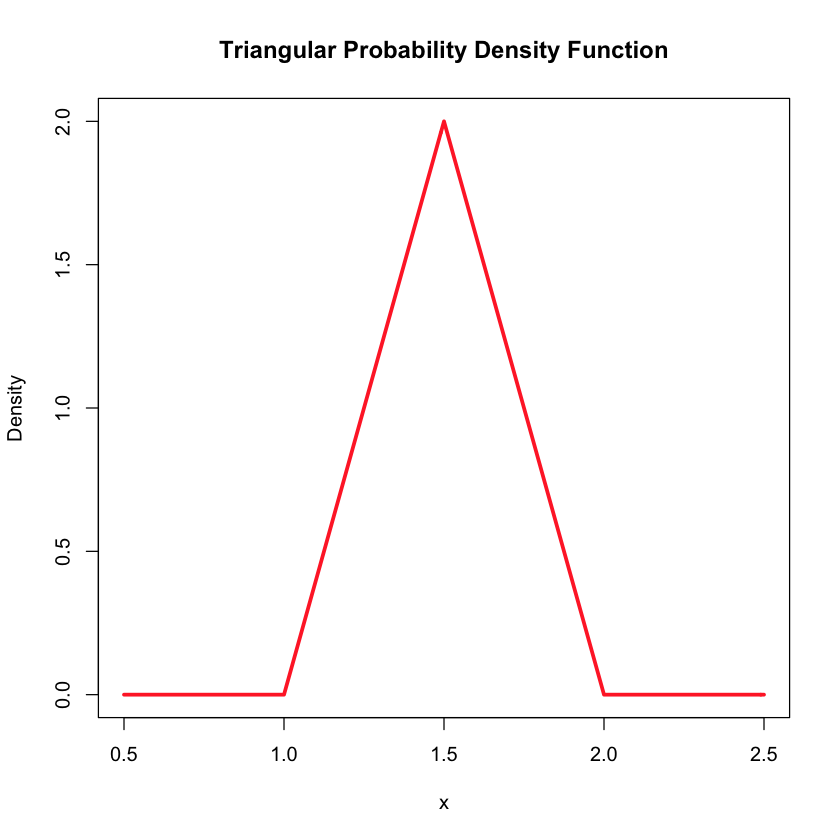

In [2]:
df <- function(x,a=1,b=2,c=1.5){
    ifelse(a<=x&x<c, (2*(x-a))/((b-a)*(c-a)), ifelse(c<=x&x<=b, 2*(b-x)/((b-a)*(b-c)),0))
}

x <- seq(0.5,2.5,0.01)
y <- df(x)
plot(x, 
     y,
     type='l',
     ylab='Density',
     col = 'firebrick1',
     main='Triangular Probability Density Function',
     lwd=3)

### B

In order to generate random numbers from the triangular distribution I need to calculate the inverse CDF, namely inverting the following function:

First part $[a,x]$:
$$CDF[f](x)=\int_a^x\frac{2(x-a)}{(b-a)(c-a)}=\frac{(x-a)^2}{(b-a)(c-a)}$$
Second part $[c,x]$:
$$CDF[f](x)=\int_c^x \frac{2(b-x)}{(b-a)*(b-c)}=\frac{2bx-x^2}{(b-a)(b-c)}-\frac{2bc-c^2}{(b-a)(b-c)}+\frac{c-a}{b-a}$$
where $a$ is the first point, $c$ is the maximum and $b$ the last point.

In [3]:
pf <- function(x,a=1,b=2,c=1.5){
    ifelse(x<=c&x>=a,(x-a)^2/((b-a)*(c-a)),
    ifelse(x<=b&x>=c,(2*b*x-x^2)/((b-a)*(b-c))-(2*b*c-c^2)/((b-a)*(b-c))+(c-a)/(b-a),                                  
    0))
}

For the sake of lightening the notation, I define the following $k,\bar{k},d$: $$k=\frac{c-a}{b-a}\,\,\,\,\,\,\bar{k}=(b-a)(b-c)\,\,\,\,\,\,d=-\frac{2bc-c^2}{k+\bar{k}}$$
Then, inverting the CDF function in the two intervals I obtain the quantile function:
$$CDF^{-1}[f](y)=\begin{cases} a+\sqrt{(b-a)(c-a)y} & \mbox{if } y<k \\ b-\sqrt{b^2+\bar{k}(d-y)} & \mbox{if } y>k \end{cases}$$

### C

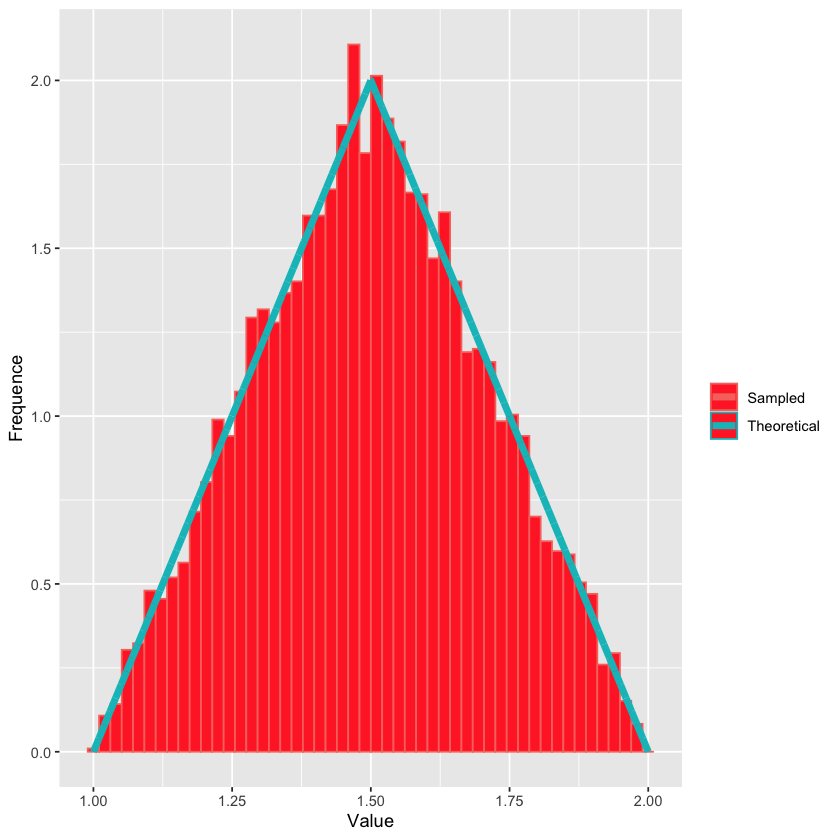

In [4]:
qf <- function(y,a=1,b=2,c=1.5){
    k <- (c-a)/(b-a)
    k_<- (b-a)*(b-c) 
    d<- -(2*b*c-c^2)/k_+k
    return(ifelse(y<k,sqrt((b-a)*(c-a)*y)+a, b-sqrt(b^2+k_*(d-y))))
}

n<-10^4

x1<-seq(1, 2, length.out=n)
y1<-df(x1)
data<-data.frame(samples=qf(runif(n)), x=x1, y=y1)

ggplot() + 
geom_histogram(data=data, bins=50, aes(x=samples, y=..density.., color="Sampled"), fill="firebrick1") +
labs( x="Value", y= "Frequence", color = "") +
geom_line(data = data, aes(x = x, y = y, color = "Theoretical" ), size=2)

## Exercise 2 - Markov Inequality

In [5]:
fgen <- c("pexp", "punif", "pbinom", "ppois")

fpar <- list(
    list(rate = 1),
    list(min = 3, max = 5),
    list(size = 1, prob=1/2),
    list(lambda = 1/2))
results <- invoke_map(fgen, fpar, q = seq(0,10,0.1))

x<-seq(0,10,0.1)
G <- function(x){return (1-x)}

In [6]:
data <- data.frame(num=x,
                   exp=G(results[[1]]),
                   uni=G(results[[2]]),
                   bin=G(results[[3]]),
                   poi=G(results[[4]]))

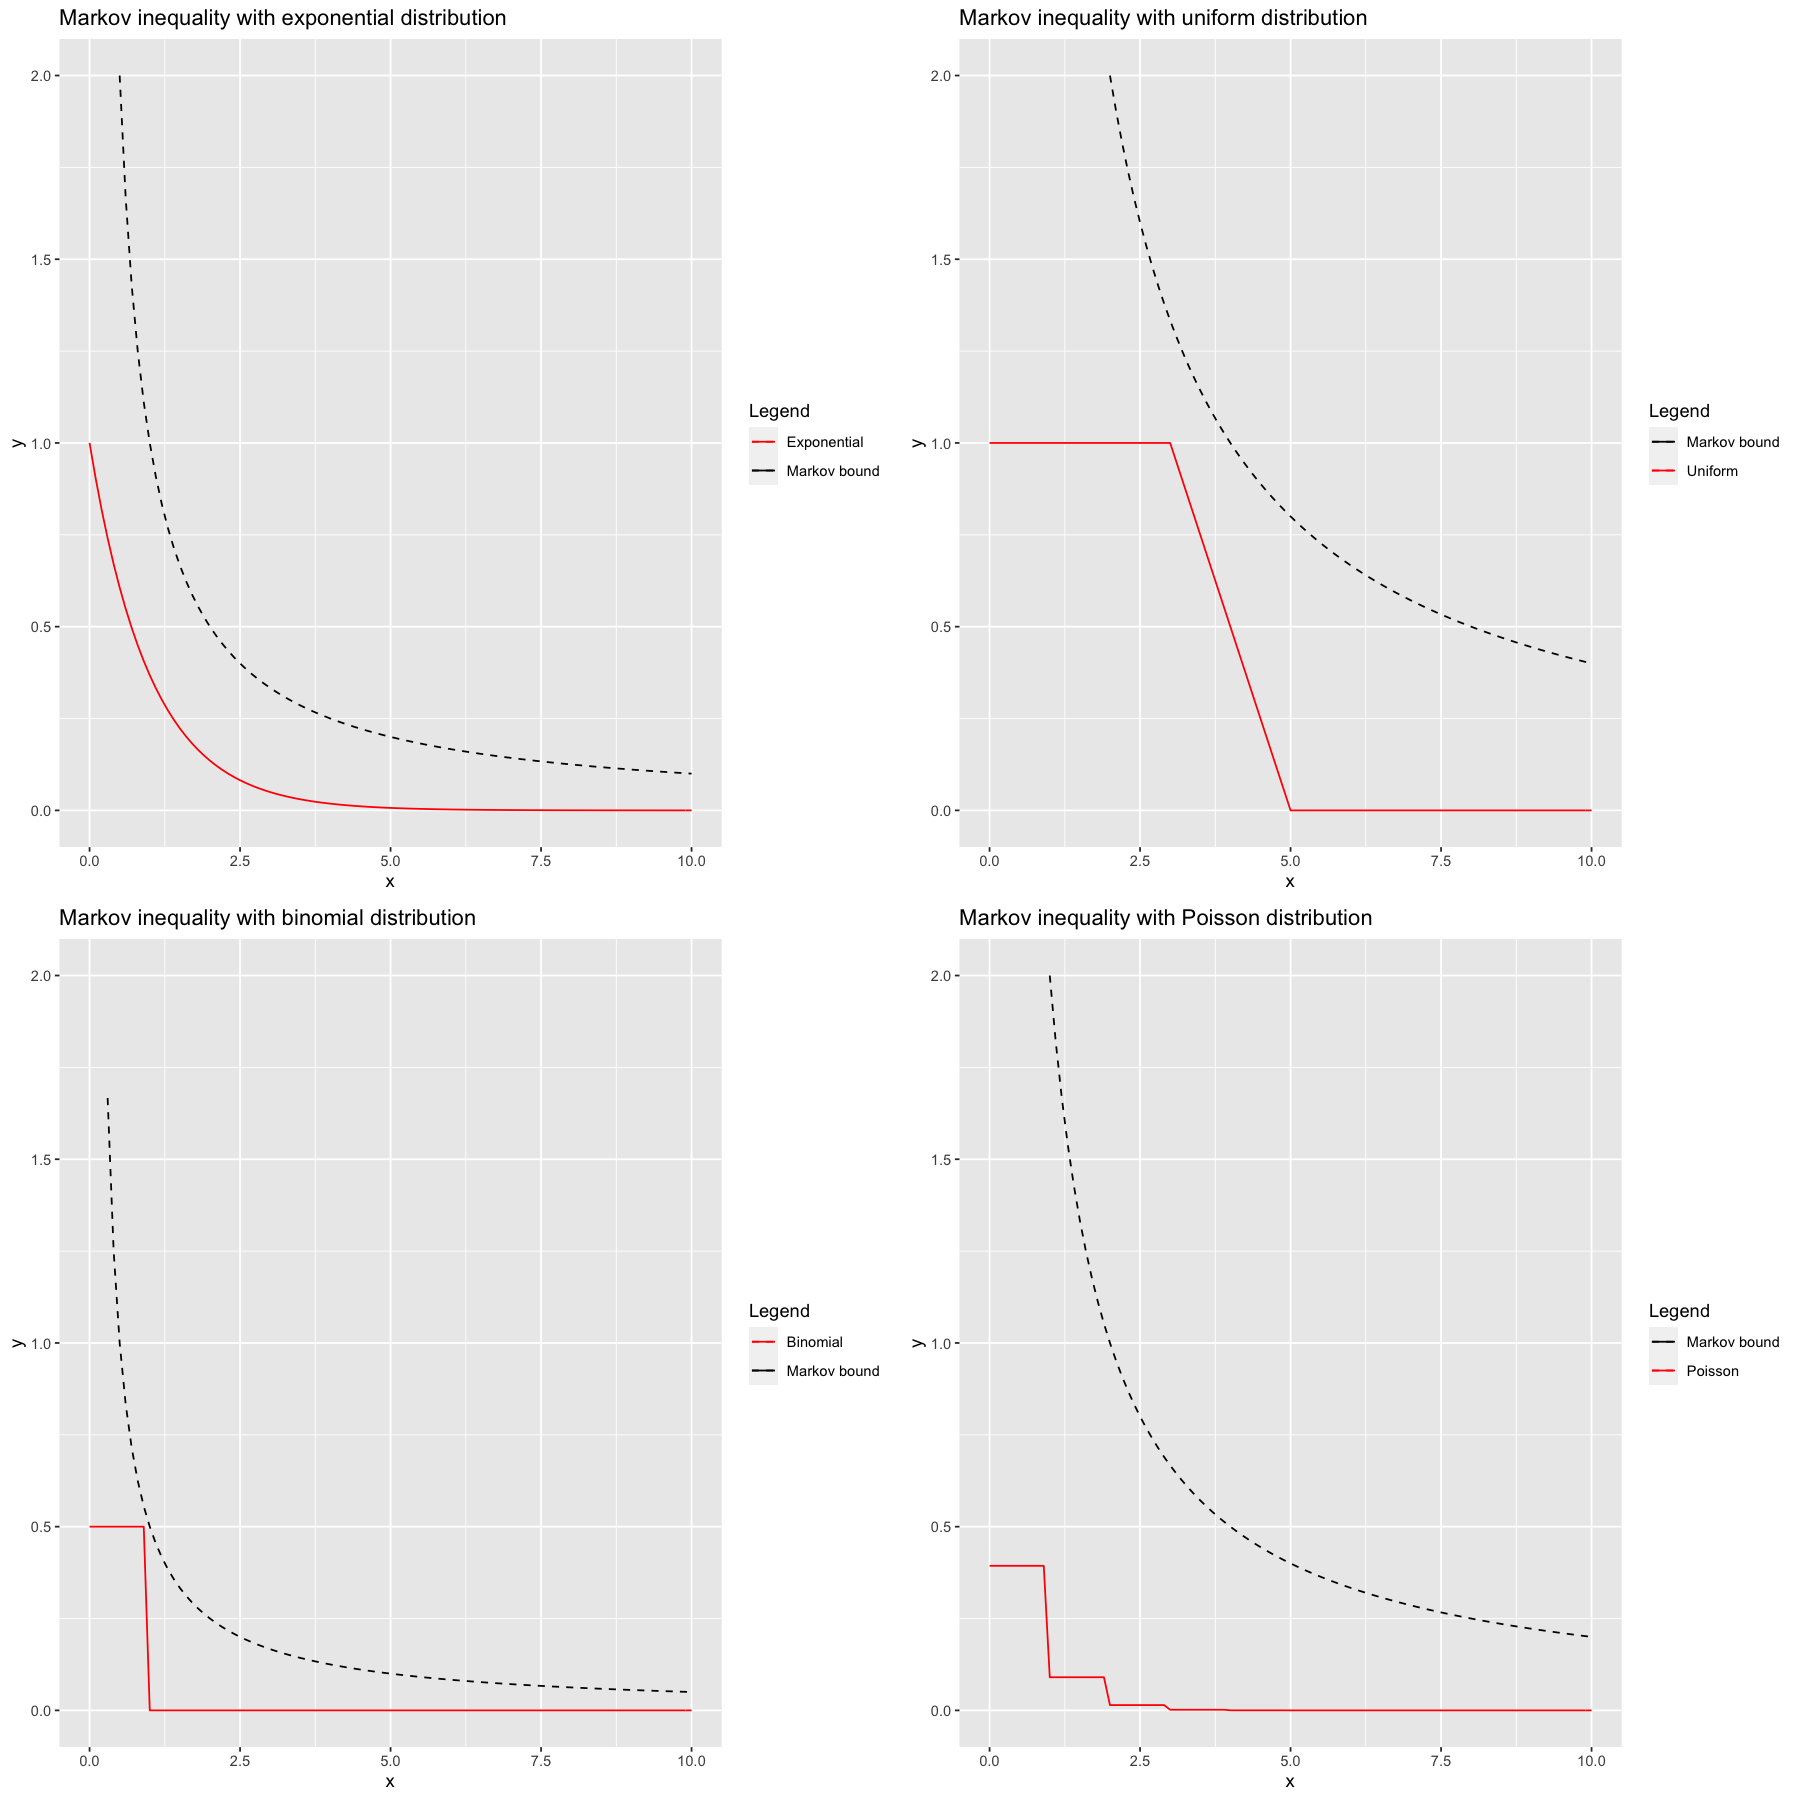

In [7]:
options(repr.plot.width=15, repr.plot.height=15)
colors <- c("Exponential" = "red",
            "Uniform" = 'red',
            "Binomial" = 'red',
            "Poisson" = 'red',
            "Markov bound" = "black")

p1<-ggplot(data) +
geom_line(aes(x=num,y=exp, colour="Exponential")) +
geom_line(aes(x=num,y=1/num, colour="Markov bound"),linetype = "dashed")+
ylim(0, 2)+
ggtitle("Markov inequality with exponential distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p2<-ggplot(data) +
geom_line(aes(x=num,y=uni, colour="Uniform")) +
geom_line(aes(x=num,y=4/num, colour="Markov bound"),linetype = "dashed") +
  ylim(0, 2) +
ggtitle("Markov inequality with uniform distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p3<-ggplot(data) +
geom_line(aes(x=num,y=bin, colour="Binomial")) +
geom_line(aes(x=num,y=0.5/num, colour="Markov bound"),linetype = "dashed") +
  ylim(0, 2)+
ggtitle("Markov inequality with binomial distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p4<-ggplot(data) +
geom_line(aes(x=num,y=poi, colour="Poisson")) +
geom_line(aes(x=num,y=2/num, colour="Markov bound"),linetype = "dashed")+
  ylim(0, 2) +
ggtitle("Markov inequality with Poisson distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

We clearly see from the graphs that the Markov's inequality holds: the black dotted line, representing the Markov bound, is always above the distributions.

## Exercise 3 - Chebyshev Inequality

We set the general framework:
$$P(|X-\mu|\geq k\sigma)\leq \frac{1}{k^2}\Rightarrow P(|X-\mu|<k\sigma)\geq1-\frac{1}{k^2}$$ The left hand side can be rewritten as: $$P(|X-\mu|<k\sigma)=P(X<\mu+k\sigma)-P(X<\mu-k\sigma)$$ That can be further rewritten as:
$$CDF(\mu+k\sigma)-CDF(\mu-k\sigma)\geq1-\frac{1}{k^2}$$

In [8]:
#Chebyshev bound
k <- seq(1, 10, 0.01)
c <- 1-1/k^2

### A $\mathcal{N}(\mu=3,\sigma=5)$

In [9]:
mu <- 3
sigma <- 5
f1 <- pnorm(mu+k*sigma, mean=mu, sd=sigma)-pnorm(mu-k*sigma, mean=mu, sd=sigma)

### B $Exp(\lambda=1)$

In [10]:
lambda<-1
mu<-1/lambda
sigma<-1/lambda
f2 <- pexp(mu+k*sigma, rate=1)-pexp(mu-k*sigma, rate=1)

### C $\mathcal{U}(1-\sqrt{2},1+\sqrt{2})$

In [11]:
min=1-sqrt(2)
max=1+sqrt(2)
mu=(min+max)/2
sigma=(max-min)/sqrt(12)
f3 <- punif(mu+k*sigma,min=min,max=max)-punif(mu-k*sigma,min=min,max=max)

### D $Pois(\lambda=\frac{1}{3})$

In [12]:
lambda<-1/3
mu<-lambda
sigma<-sqrt(lambda)
f4<-ppois(mu + k*sigma, lambda=lambda) - ppois(mu - k*sigma, lambda=lambda)

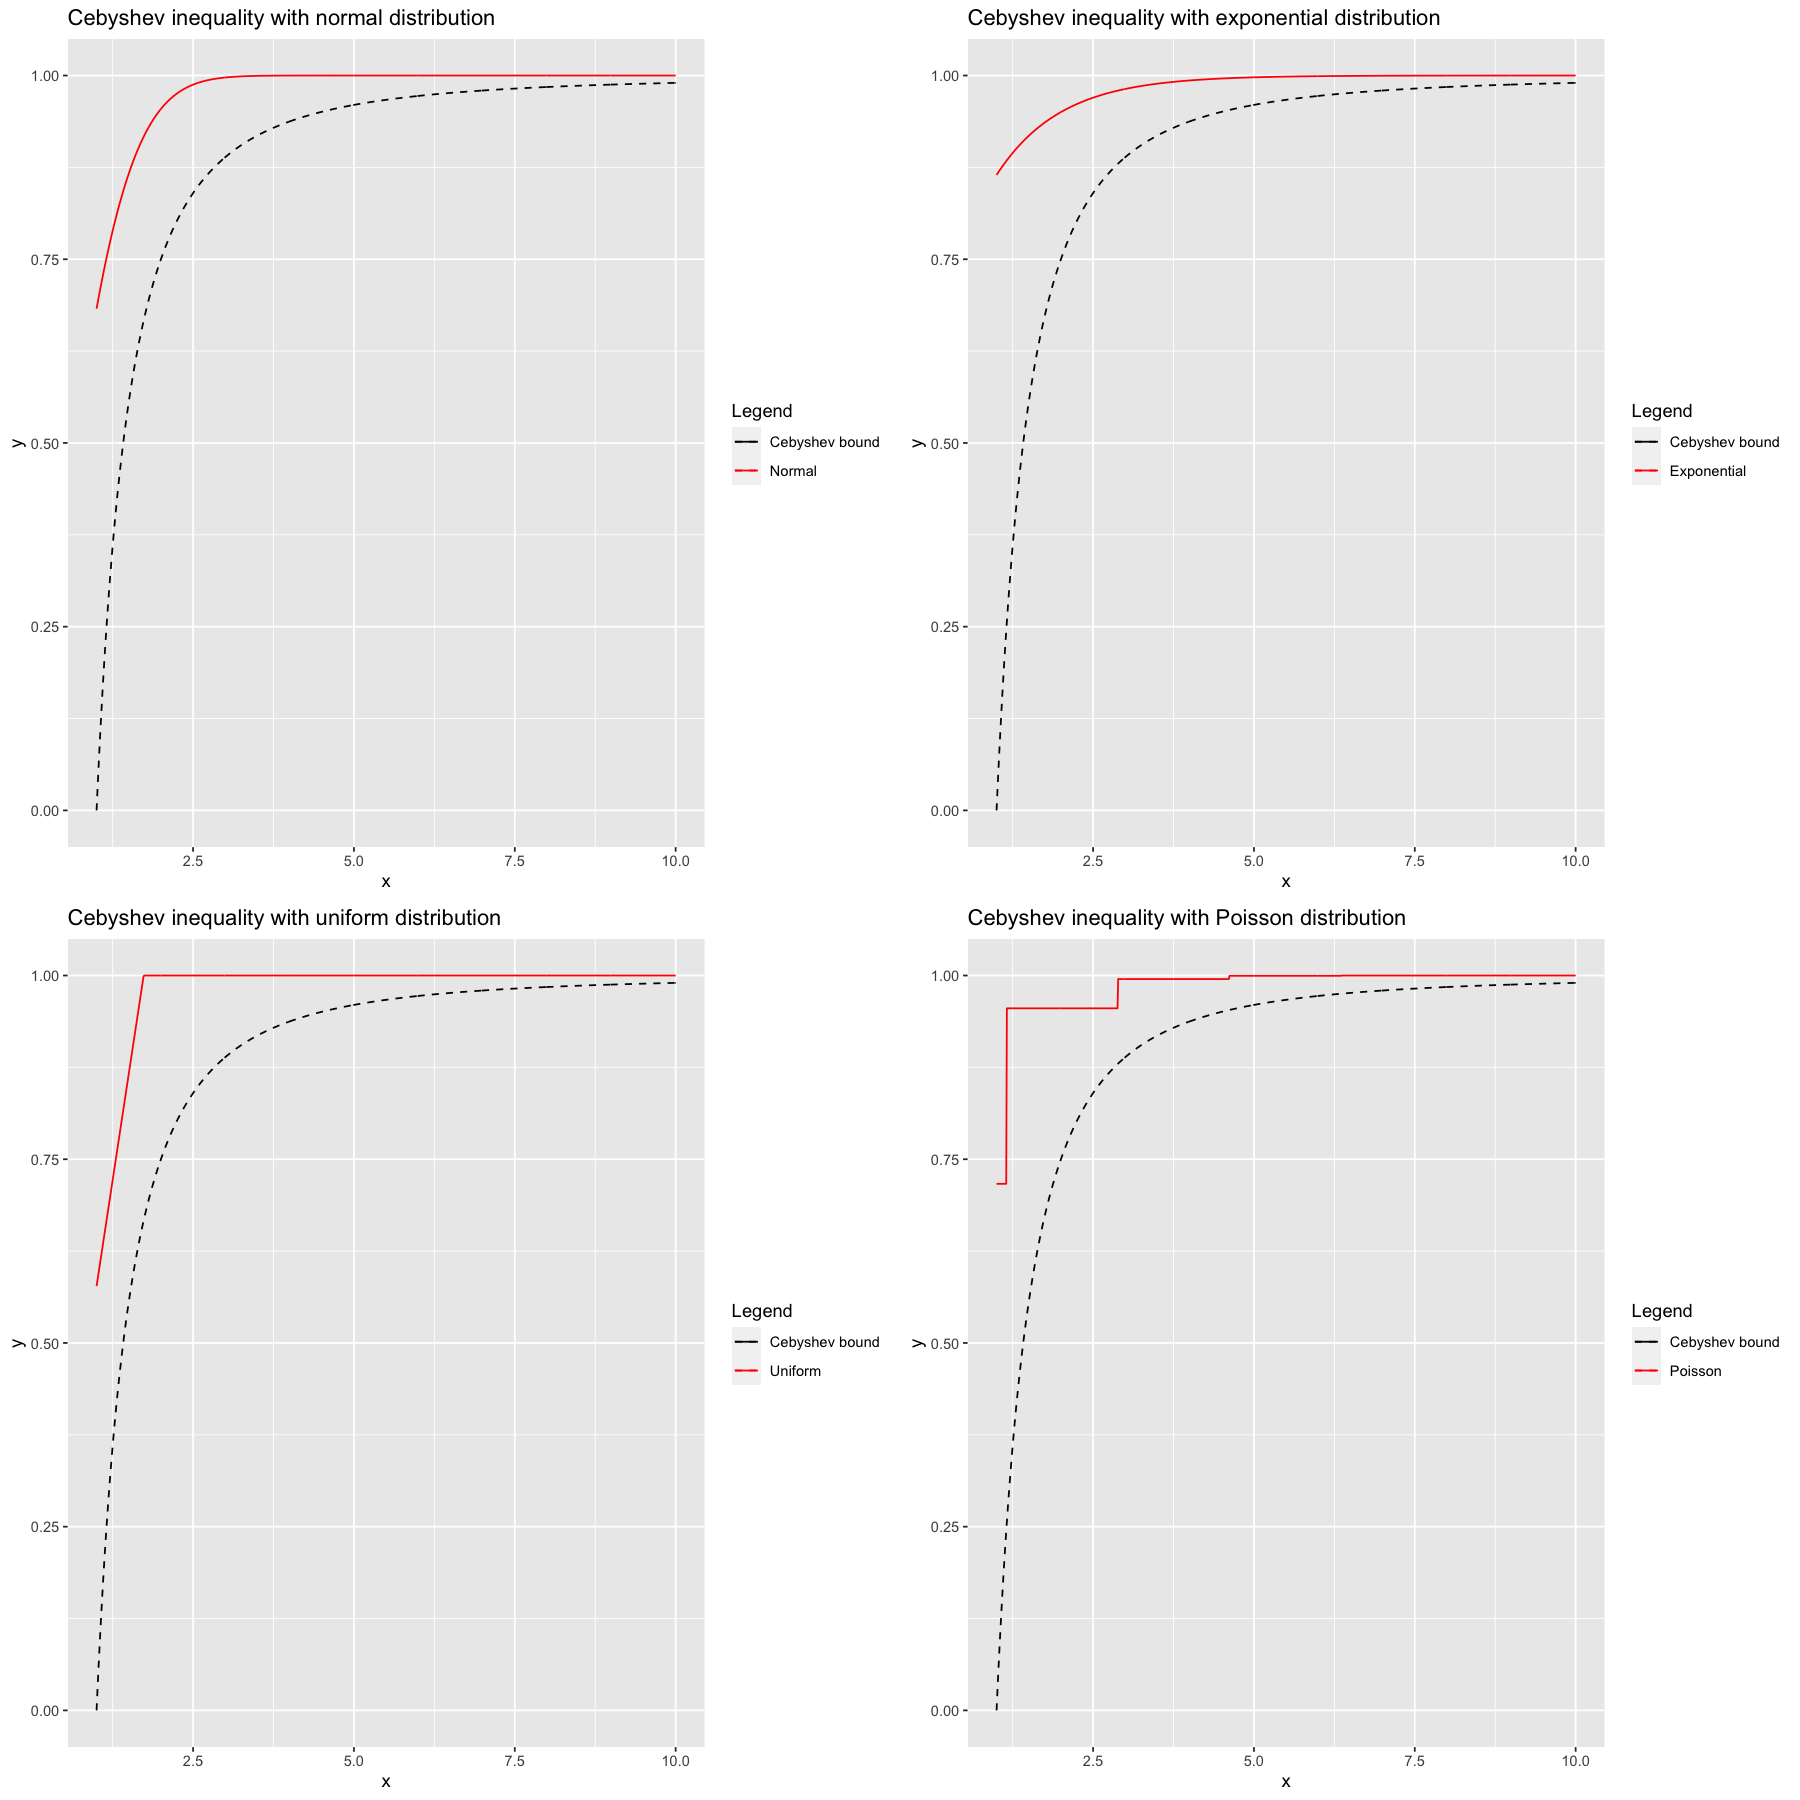

In [13]:
#dataframe and plots
data <- data.frame(num=k, bound=c, nor=f1, exp=f2, uni=f3, poi=f4)

colors <- c("Normal" = "red",
            "Exponential" = 'red',
            "Uniform" = 'red',
            "Poisson" = 'red',
            "Cebyshev bound" = "black")

p1<-ggplot(data) +
geom_line(aes(x=num,y=nor, colour="Normal")) +
geom_line(aes(x=num,y=bound, colour="Cebyshev bound"),linetype = "dashed")+
ggtitle("Cebyshev inequality with normal distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p2<-ggplot(data) +
geom_line(aes(x=num,y=exp, colour="Exponential")) +
geom_line(aes(x=num,y=bound, colour="Cebyshev bound"),linetype = "dashed")+
ggtitle("Cebyshev inequality with exponential distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p3<-ggplot(data) +
geom_line(aes(x=num,y=uni, colour="Uniform")) +
geom_line(aes(x=num,y=bound, colour="Cebyshev bound"),linetype = "dashed") +
ggtitle("Cebyshev inequality with uniform distribution")+
labs(x="x", y="y", colour ="Legend")+
scale_color_manual(values = colors)

p4<-ggplot(data) +
geom_line(aes(x=num,y=poi, colour="Poisson")) +
geom_line(aes(x=num,y=bound, colour="Cebyshev bound"),linetype = "dashed")+
ggtitle("Cebyshev inequality with Poisson distribution")+
labs(x="x", y="y", color ="Legend")+
scale_color_manual(values = colors)

grid.arrange(p1,p2,p3,p4,ncol=2,nrow=2)

We clearly see from the graphs that the Chebysehev's inequality holds: the black dotted line, representing the Chebysehev's bound, is always below the difference between the distinct cumulative distributions.

## Exercise 4 - Community Mobility Open Data

### Italy

In [14]:
ITA_20 <- read_csv('2020_IT_Region_Mobility_Report.csv')
ITA_21 <- read_csv('2021_IT_Region_Mobility_Report.csv')
ITA_20$week = lubridate::week(ITA_20$date)
ITA_21$week = lubridate::week(ITA_21$date)
ITA_20$month = lubridate::month(ITA_20$date)
ITA_21$month = lubridate::month(ITA_21$date)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_characte

### Sweden

In [15]:
SWE_20 <- read_csv('2020_SE_Region_Mobility_Report.csv')
SWE_21 <- read_csv('2021_SE_Region_Mobility_Report.csv')
SWE_20$week = lubridate::week(SWE_20$date)
SWE_21$week = lubridate::week(SWE_21$date)
SWE_20$month = lubridate::month(SWE_20$date)
SWE_21$month = lubridate::month(SWE_21$date)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_character(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_characte

### Great Britain

In [16]:
ENG_20 <- read_csv('2020_GB_Region_Mobility_Report.csv')
ENG_21 <- read_csv('2021_GB_Region_Mobility_Report.csv')
ENG_20$week = lubridate::week(ENG_20$date)
ENG_21$week = lubridate::week(ENG_21$date)
ENG_20$month = lubridate::month(ENG_20$date)
ENG_21$month = lubridate::month(ENG_21$date)


── Column specification ────────────────────────────────────────────────────────
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  place_id = col_character(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)


Warning message:
“85301 parsing failures.
 row          col           expected         actual                                 file
6374 sub_region_2 1/0/T/F/TRUE/FALSE Aylesbury Vale '2020_GB_Region_Mobility_Report.csv'
6375 sub_r

In [19]:
mean.cal <- function(x, isMonthly){
    #Function for computing weekly (isMonthly=FALSE) and monthly mean (isMonthly=TRUE)
    
    wm = ''
    if (isMonthly == FALSE){
        mean.out <- x %>% group_by(country_region,week) %>% summarize(retail_mean = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
                                                                      grocery_mean = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
                                                                      parks_mean = mean(parks_percent_change_from_baseline, na.rm = TRUE),
                                                                      transit_mean = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
                                                                      works_mean = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
                                                                      home_mean = mean(residential_percent_change_from_baseline, na.rm = TRUE), .groups = 'drop')  
    } else {
        mean.out <- x %>% group_by(country_region,month) %>% summarize(monthly_retail_mean = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
                                                                       monthly_grocery_mean = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
                                                                       monthly_parks_mean = mean(parks_percent_change_from_baseline, na.rm = TRUE),
                                                                       monthly_transit_mean = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
                                                                       monthly_works_mean = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
                                                                       monthly_home_mean = mean(residential_percent_change_from_baseline, na.rm = TRUE), .groups = 'drop')
    }

    return(mean.out)
}

ITA_20_means <- mean.cal(ITA_20, FALSE)
SWE_20_means <- mean.cal(SWE_20, FALSE)
ENG_20_means <- mean.cal(ENG_20, FALSE)
ITA_20_monthly_means <- mean.cal(ITA_20, TRUE)
SWE_20_monthly_means <- mean.cal(SWE_20, TRUE)
ENG_20_monthly_means <- mean.cal(ENG_20, TRUE)

## Weekly variations

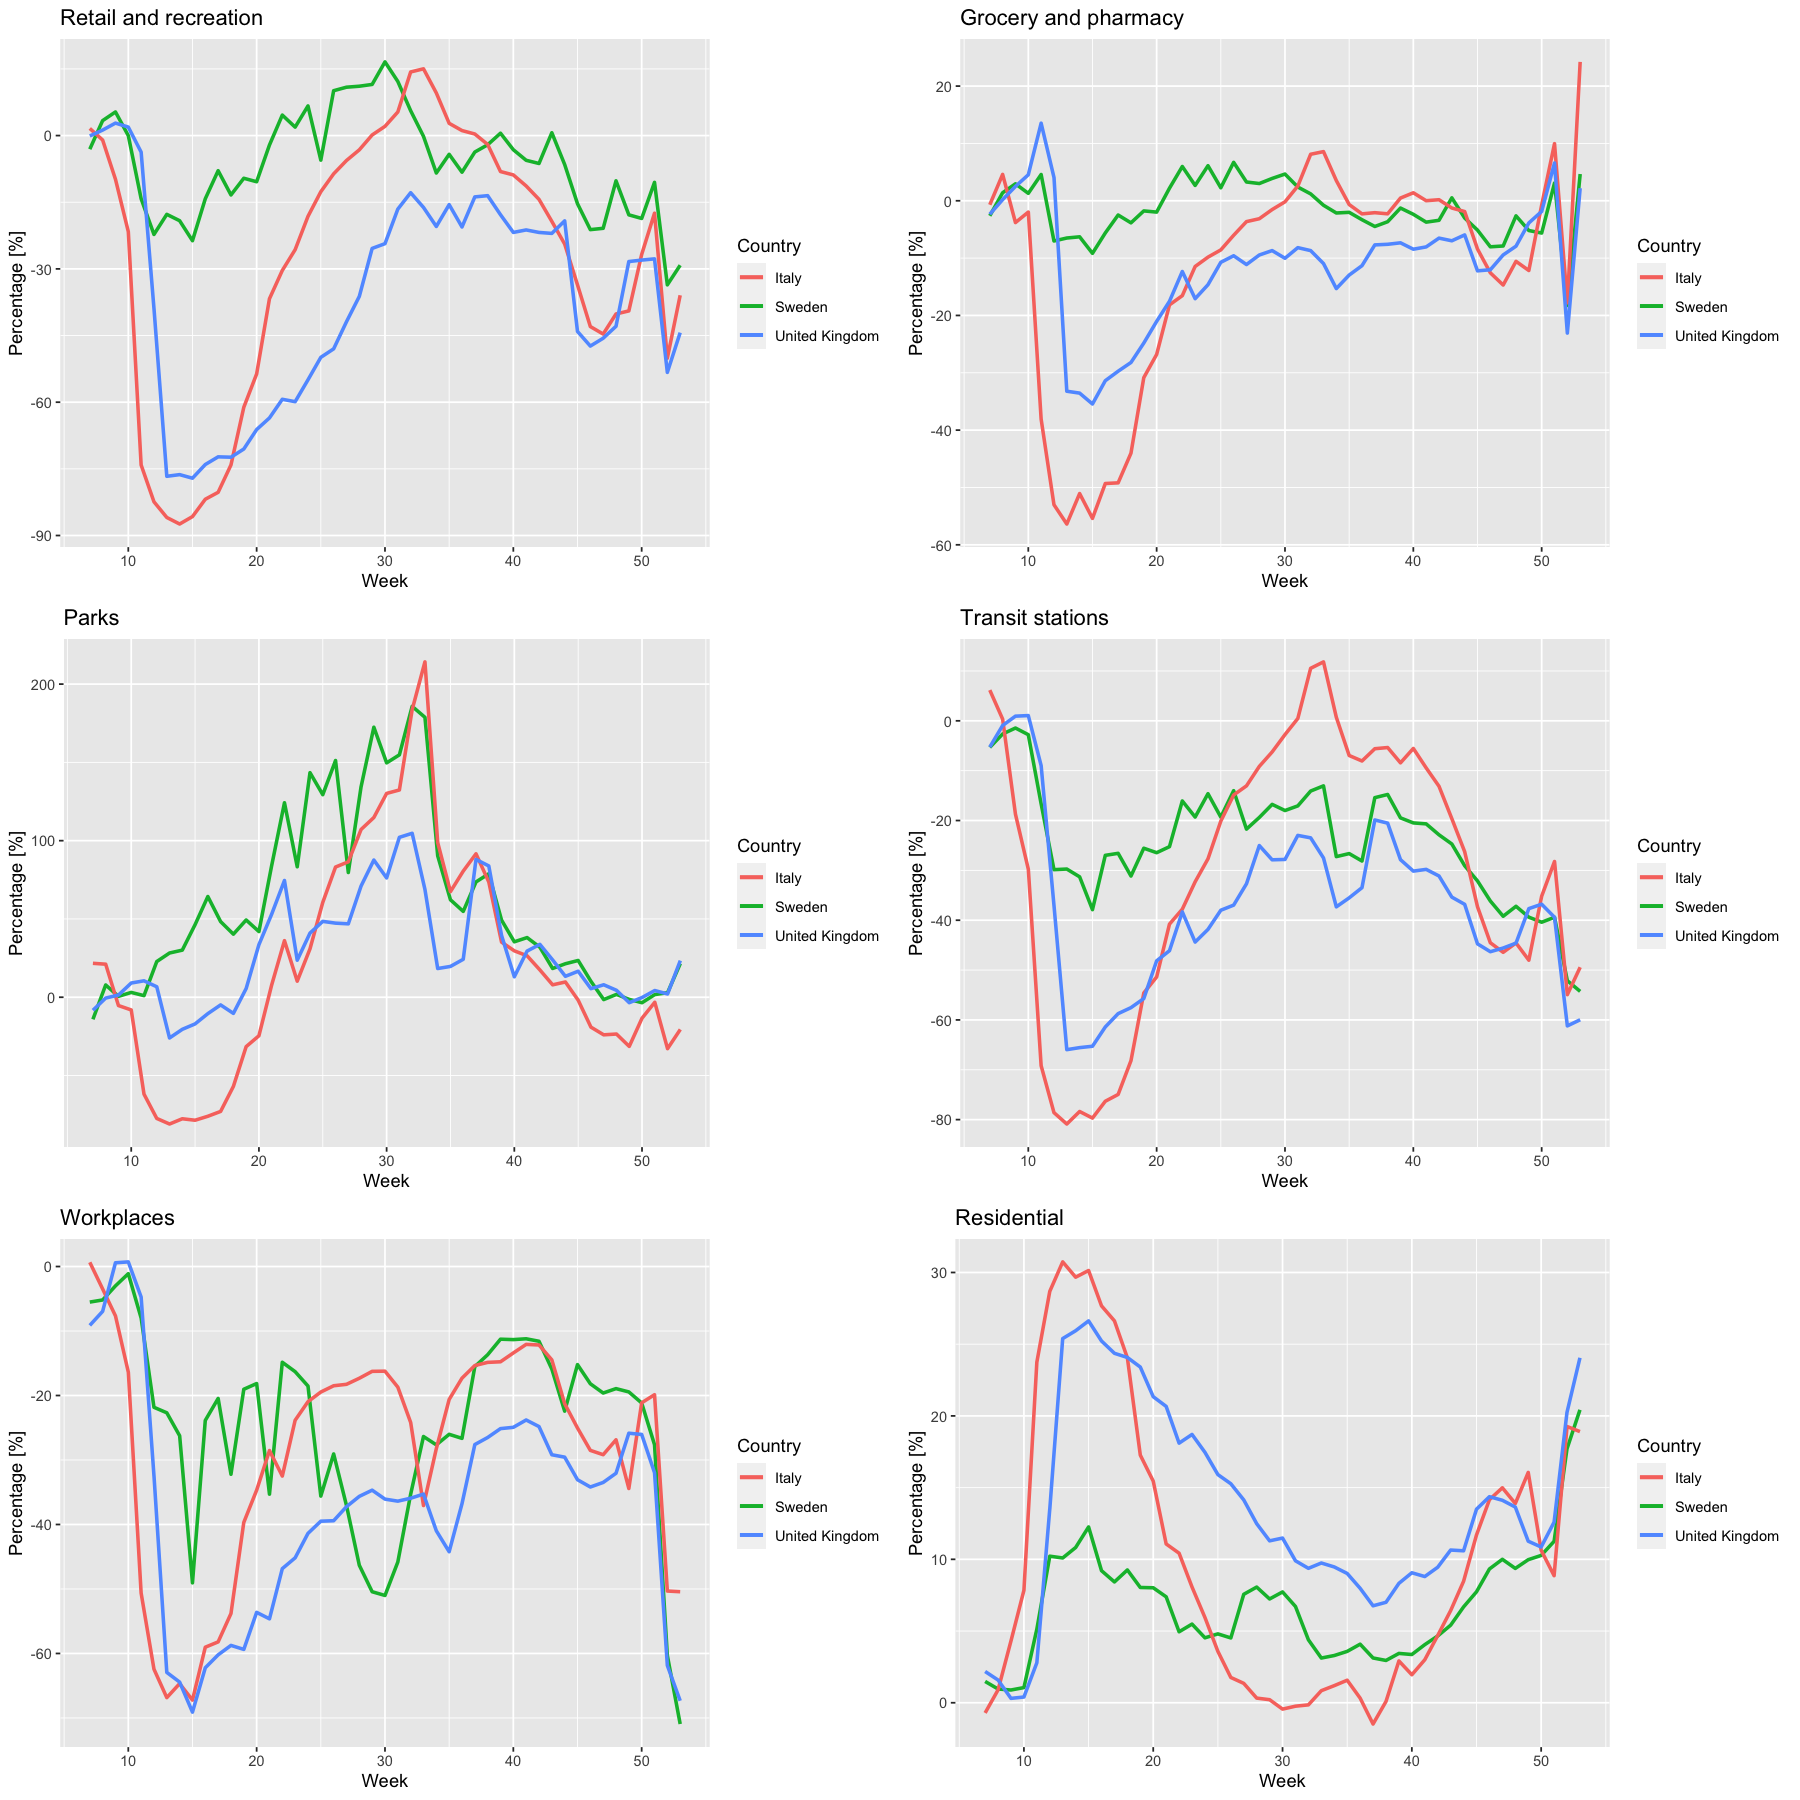

In [20]:
options(repr.plot.width=15, repr.plot.height=15)

p1<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=retail_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=retail_mean, color = country_region), size = 1)  +
geom_line(data=ENG_20_means,aes(x=week, y=retail_mean, color = country_region), size = 1) +
ggtitle("Retail and recreation")+
labs(x="Week", y="Percentage [%]", colour="Country")

p2<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=grocery_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=grocery_mean, color = country_region), size = 1)+
geom_line(data=ENG_20_means,aes(x=week, y=grocery_mean, color = country_region), size = 1) +
ggtitle("Grocery and pharmacy")+
labs(x="Week", y="Percentage [%]", colour="Country")

p3<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=parks_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=parks_mean, color = country_region), size = 1)  +
geom_line(data=ENG_20_means,aes(x=week, y=parks_mean, color = country_region), size = 1) +
ggtitle("Parks")+
labs(x="Week", y="Percentage [%]", colour="Country")

p4<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=transit_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=transit_mean, color = country_region), size = 1)+
geom_line(data=ENG_20_means,aes(x=week, y=transit_mean, color = country_region), size = 1) +
ggtitle("Transit stations")+
labs(x="Week", y="Percentage [%]", colour="Country")

p5<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=works_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=works_mean, color = country_region), size = 1)+
geom_line(data=ENG_20_means,aes(x=week, y=works_mean, color = country_region), size = 1) +
ggtitle("Workplaces")+
labs(x="Week", y="Percentage [%]", colour="Country")

p6<-ggplot() +
geom_line(data=SWE_20_means,aes(x=week, y=home_mean, color = country_region), size = 1) +
geom_line(data=ITA_20_means,aes(x=week, y=home_mean, color = country_region), size = 1)+
geom_line(data=ENG_20_means,aes(x=week, y=home_mean, color = country_region), size = 1) +
ggtitle("Residential")+
labs(x="Week", y="Percentage [%]", colour="Country")

grid.arrange(p1,p2,p3,p4,p5,p6,ncol=2,nrow=3)

In comparison with the one in Italy and England between weeks 10 and 20, the lockdown in Sweden was weaker. It is exactly in that time interval that we can see the effect of the lockdowns.

## Monthly variations

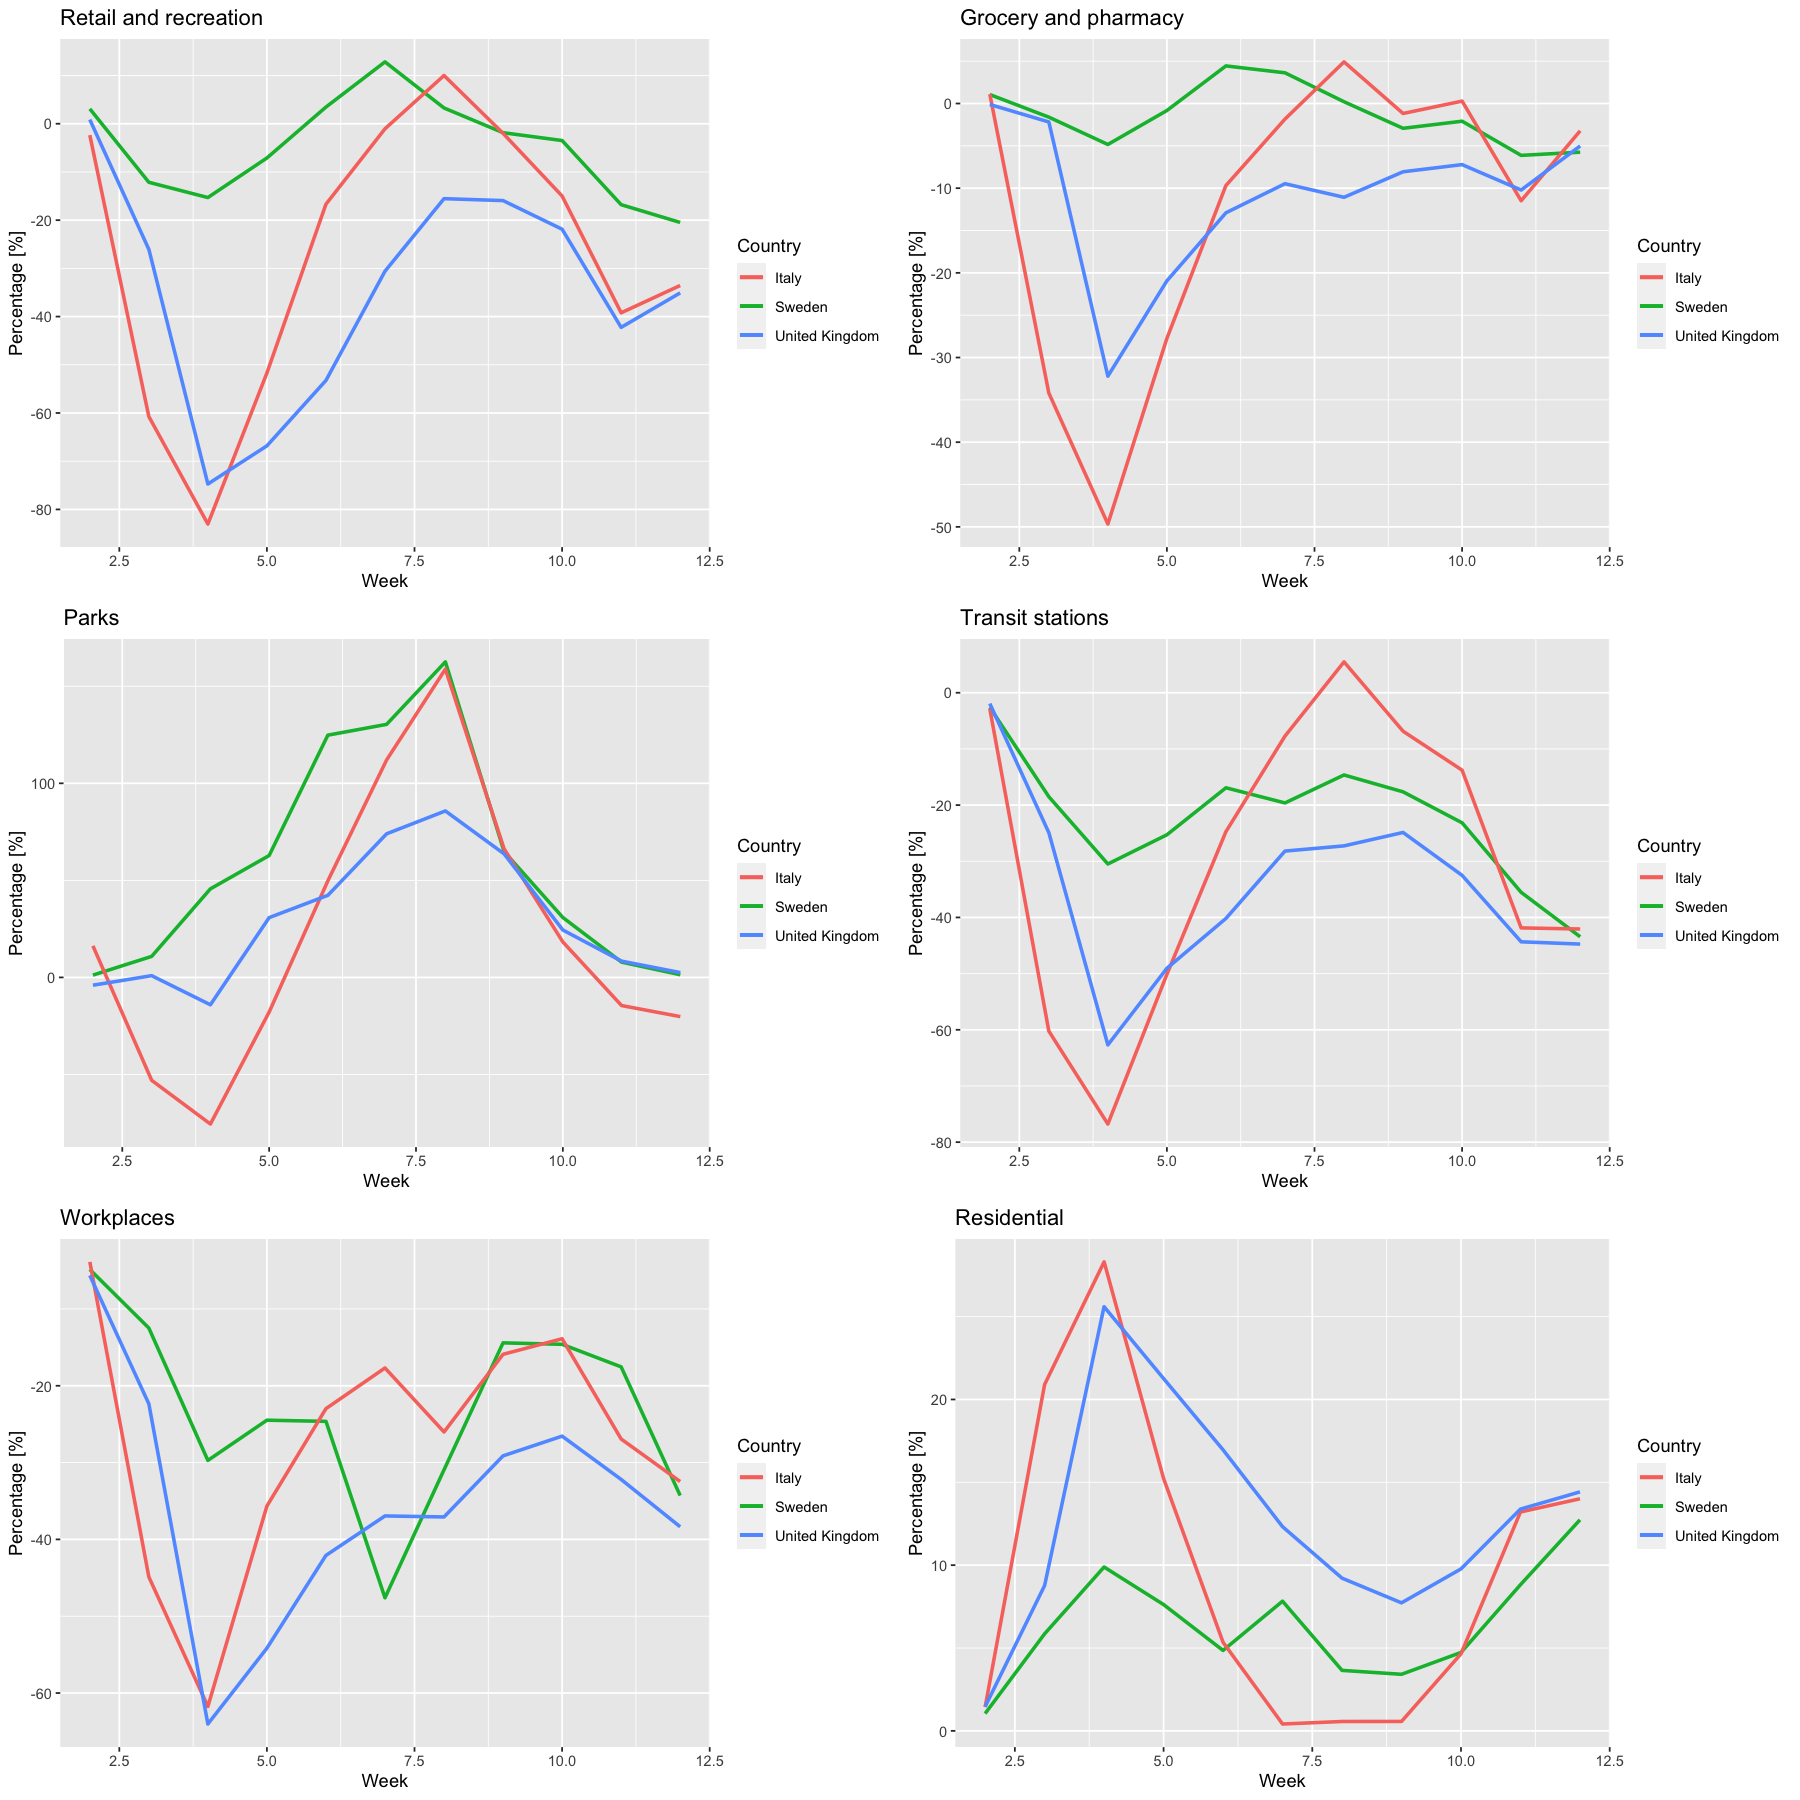

In [21]:
p1<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_retail_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_retail_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_retail_mean, color=country_region), size = 1) +
ggtitle("Retail and recreation")+
labs(x="Week", y="Percentage [%]", colour="Country")

p2<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_grocery_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_grocery_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_grocery_mean, color=country_region), size = 1) +
ggtitle("Grocery and pharmacy")+
labs(x="Week", y="Percentage [%]", colour="Country")

p3<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_parks_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_parks_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_parks_mean, color=country_region), size = 1) +
ggtitle("Parks")+
labs(x="Week", y="Percentage [%]", colour="Country")

p4<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_transit_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_transit_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_transit_mean, color=country_region), size = 1) +
ggtitle("Transit stations")+
labs(x="Week", y="Percentage [%]", colour="Country")

p5<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_works_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_works_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_works_mean, color=country_region), size = 1) +
ggtitle("Workplaces")+
labs(x="Week", y="Percentage [%]", colour="Country")

p6<-ggplot() +
geom_line(data=SWE_20_monthly_means,aes(x=month, y=monthly_home_mean, color=country_region), size = 1) +
geom_line(data=ITA_20_monthly_means,aes(x=month, y=monthly_home_mean, color=country_region), size = 1) +
geom_line(data=ENG_20_monthly_means,aes(x=month, y=monthly_home_mean, color=country_region), size = 1) +
ggtitle("Residential")+
labs(x="Week", y="Percentage [%]", colour="Country")

grid.arrange(p1,p2,p3,p4,p5,p6,ncol=2,nrow=3)

# Focus on my region: Friuli Venezia Giulia

I come from a small town within Pordenone district in Friuli and I wanted to plot the weekly variations in each of the districts in my region.

### 2020 - Weekly variations

In [22]:
ITA_20_region <- ITA_20 %>% group_by(sub_region_1,sub_region_2, week) %>% summarize(retail_mean = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
                                                        grocery_mean = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
                                                        parks_mean = mean(parks_percent_change_from_baseline, na.rm = TRUE),
                                                        transit_mean = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
                                                        works_mean = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
                                                        home_mean = mean(residential_percent_change_from_baseline, na.rm = TRUE), .groups = 'drop')
FRIULI_20 <- subset(ITA_20_region, sub_region_1 == "Friuli-Venezia Giulia")

completeFun <- function(data, desiredCols) {
  completeVec <- complete.cases(data[, desiredCols])
  return(data[completeVec, ])
}
FRIULI_20 <- completeFun(FRIULI_20, "sub_region_2")

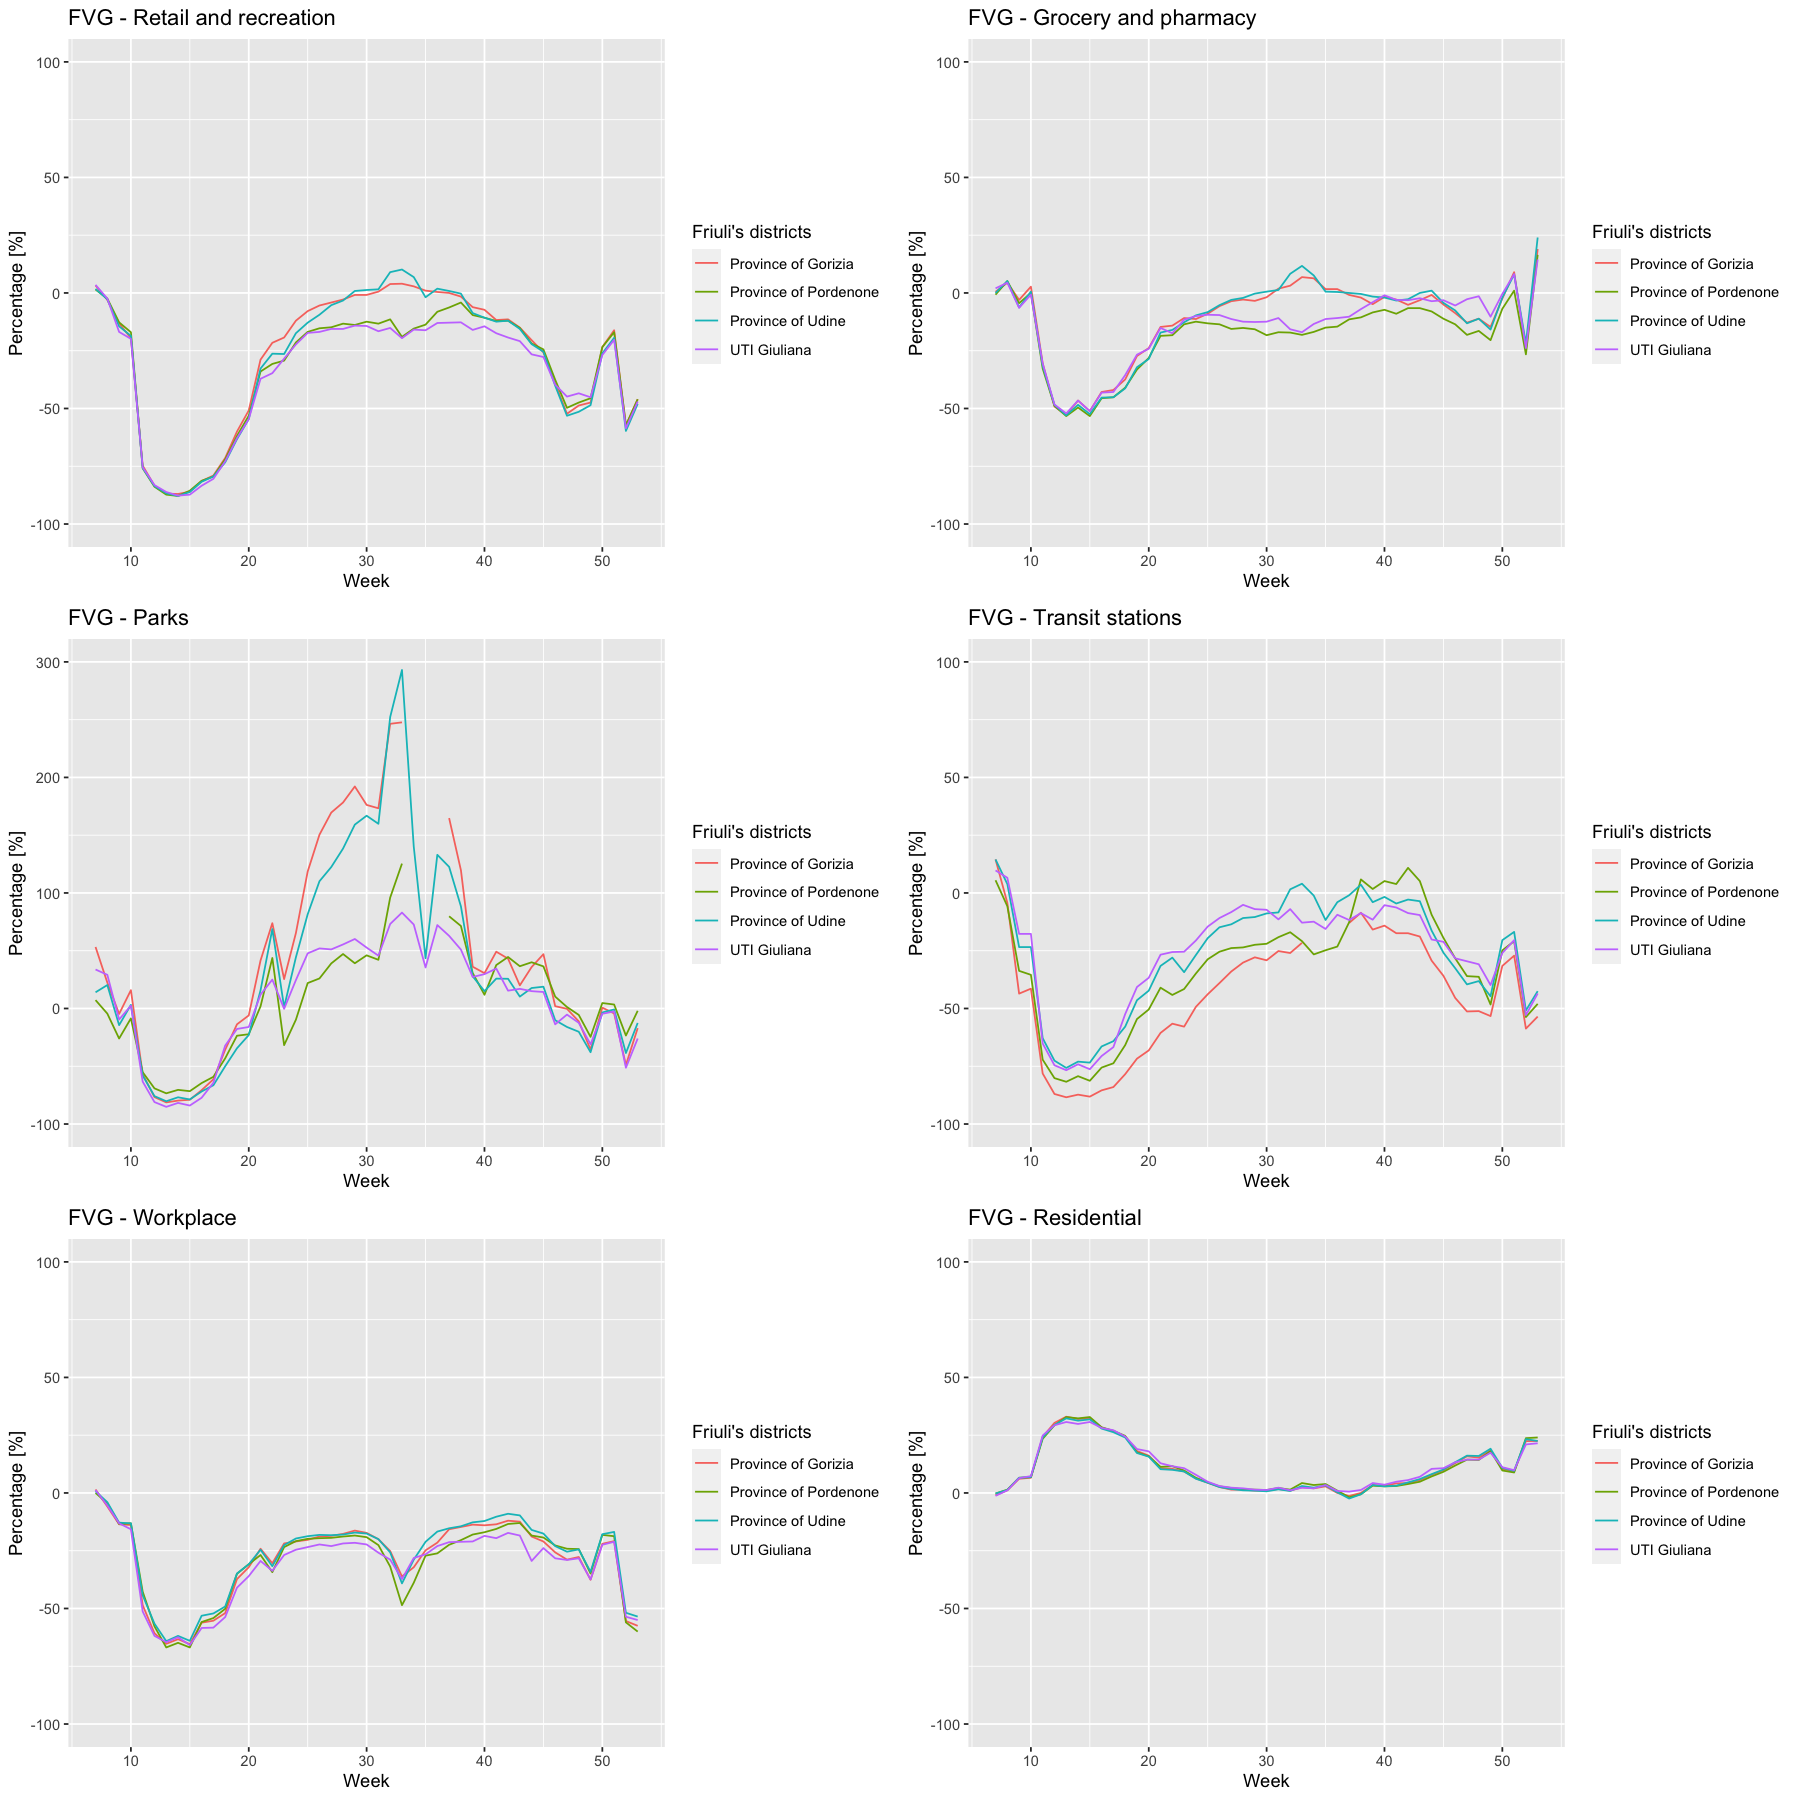

In [23]:
#pdf("Friuli20.pdf") 

p1<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=retail_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,100)+
ggtitle("FVG - Retail and recreation")

p2<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=grocery_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,100)+
ggtitle("FVG - Grocery and pharmacy")

p3<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=parks_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,300)+
ggtitle("FVG - Parks")

p4<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=transit_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,100)+
ggtitle("FVG - Transit stations")

p5<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=works_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,100)+
ggtitle("FVG - Workplace")

p6<-ggplot(FRIULI_20, aes(x=week))+
geom_line(aes(y=home_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-100,100)+
ggtitle("FVG - Residential")
                    
grid.arrange(p1,p2,p3,p4,p5,p6,ncol=2,nrow=3)
#dev.off()

Looking at these graphs of 2020, we can see that more or less all districts behaved in the same way. Again, it is worth to be noticed that in the lockdown phase (week 10 to week 20) all the percentages for *Retail and recreation*, *Parks* and *Transit stations* dropped to almost 100%. In the meanwhile, *Grocery and pharmacy* were still open but with an inferior crowding due to restrictions. 

Towards the end of july, Friulian inhabitants (especially the one living in Udine and Gorizia districts) went out to parks. In Udine province between week 30 and 35 there's an increase of almost 300%, wow! 

### 2021 - Weekly variations

In [24]:
ITA_21_region <- ITA_21 %>% group_by(sub_region_1,sub_region_2, week) %>% summarize(retail_mean = mean(retail_and_recreation_percent_change_from_baseline, na.rm = TRUE),
                                                        grocery_mean = mean(grocery_and_pharmacy_percent_change_from_baseline, na.rm = TRUE),
                                                        parks_mean = mean(parks_percent_change_from_baseline, na.rm = TRUE),
                                                        transit_mean = mean(transit_stations_percent_change_from_baseline, na.rm = TRUE),
                                                        works_mean = mean(workplaces_percent_change_from_baseline, na.rm = TRUE),
                                                        home_mean = mean(residential_percent_change_from_baseline, na.rm = TRUE), .groups = 'drop')
FRIULI_21 <- subset(ITA_21_region, sub_region_1 == "Friuli-Venezia Giulia")
FRIULI_21 <- completeFun(FRIULI_21, "sub_region_2")

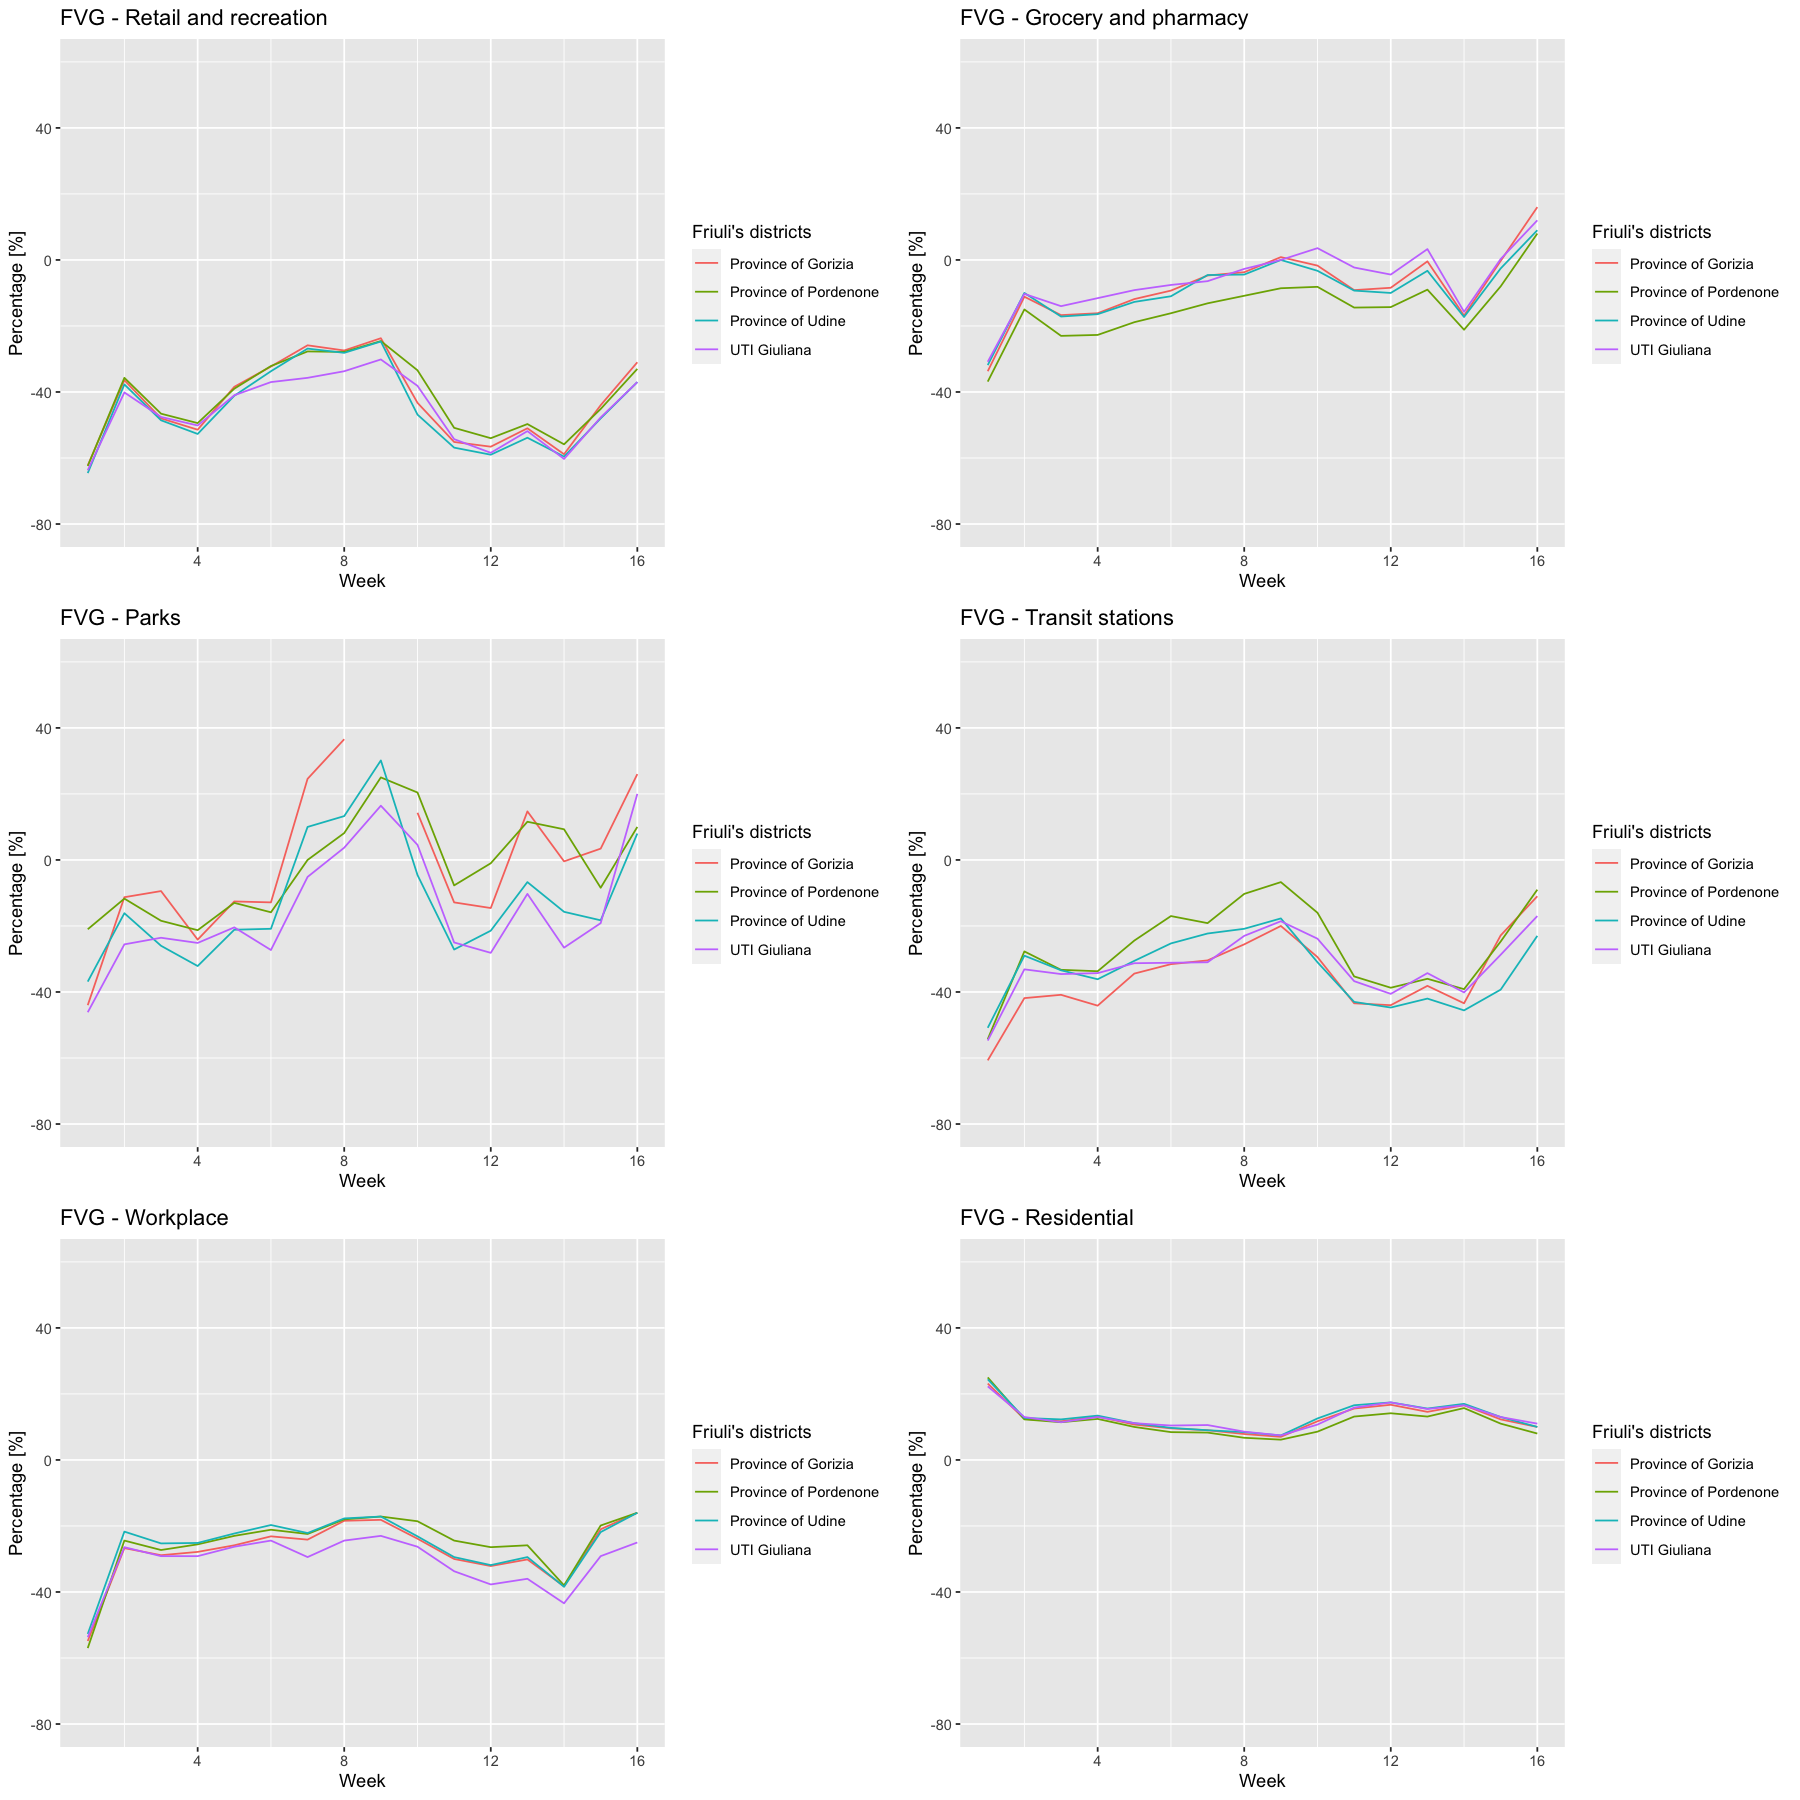

In [25]:
#pdf("Friuli21.pdf") 

p1<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=retail_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Retail and recreation")

p2<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=grocery_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Grocery and pharmacy")

p3<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=parks_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Parks")

p4<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=transit_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Transit stations")

p5<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=works_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Workplace")

p6<-ggplot(FRIULI_21, aes(x=week))+
geom_line(aes(y=home_mean, group=factor(sub_region_2), color=factor(sub_region_2))) + 
labs(x="Week", y="Percentage [%]", color="Friuli's districts")+
ylim(-80,60)+
ggtitle("FVG - Residential")
                    
grid.arrange(p1,p2,p3,p4,p5,p6,ncol=2,nrow=3)


#dev.off()